# What will we do :
###             - Drop Columns 
###             - Drop Null Values
###             - Feature Scaling
###             - Remove Outliers
###             - Encoding categories
###             - Splitting Data
###             - Building Models
###             - Evaluating Models
###             - Check Accuracy

In [124]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [146]:
missing_values=["N/a","na",np.nan]
df=pd.read_csv('dataset.csv',na_values=missing_values)
df

,property_id *,location_id *,page_url *,property_type,price,location,city,province_name,latitude,longitude,baths,area *,purpose,bedrooms,date_added *,agency *,agent *,Area Type,Area Size,Area Category *
0,237062,3325,https://www.zameen.com/Property/g_10_g_10_2_gr...,Flat,10000000,G-10,Islamabad,Islamabad Capital,33.679890,73.012640,2,4 Marla,For Sale,2,2/4/2019,NaN,NaN,Marla,4.0,0-5 Marla
1,346905,3236,https://www.zameen.com/Property/e_11_2_service...,Flat,6900000,E-11,Islamabad,Islamabad Capital,33.700993,72.971492,3,5.6 Marla,For Sale,3,5/4/2019,NaN,NaN,Marla,5.6,5-10 Marla
2,386513,764,https://www.zameen.com/Property/islamabad_g_15...,House,16500000,G-15,Islamabad,Islamabad Capital,33.631486,72.926559,6,8 Marla,For Sale,5,7/17/2019,NaN,NaN,Marla,8.0,5-10 Marla
3,656161,340,https://www.zameen.com/Property/islamabad_bani...,House,43500000,Bani Gala,Islamabad,Islamabad Capital,33.707573,73.151199,4,2 Kanal,For Sale,4,4/5/2019,NaN,NaN,Kanal,2.0,1-5 Kanal
4,841645,3226,https://www.zameen.com/Property/dha_valley_dha...,House,7000000,DHA Defence,Islamabad,Islamabad Capital,33.492591,73.301339,3,8 Marla,For Sale,3,7/10/2019,Easy Property,Muhammad Junaid Ceo Muhammad Shahid Director,Marla,8.0,5-10 Marla
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168441,17355248,6754,https://www.zameen.com/Property/gulshan_e_maym...,House,26500000,Gadap Town,Karachi,Sindh,25.029909,67.137192,0,9.6 Marla,For Sale,6,7/18/2019,Al Shahab Enterprises,Shahmir,Marla,9.6,5-10 Marla
168442,17355249,680,https://www.zameen.com/Property/gadap_town_gul...,House,12500000,Gadap Town,Karachi,Sindh,25.017951,67.136393,0,8 Marla,For Sale,3,7/18/2019,Al Shahab Enterprises,Shahmir,Marla,8.0,5-10 Marla
168443,17355250,6757,https://www.zameen.com/Property/gulshan_e_maym...,House,27000000,Gadap Town,Karachi,Sindh,25.015384,67.116330,0,9.6 Marla,For Sale,6,7/18/2019,Al Shahab Enterprises,Shahmir,Marla,9.6,5-10 Marla
168444,17355251,6752,https://www.zameen.com/Property/gulshan_e_maym...,House,11000000,Gadap Town,Karachi,Sindh,25.013265,67.120818,0,7.8 Marla,For Sale,3,7/18/2019,Al Shahab Enterprises,Shahmir,Marla,7.8,5-10 Marla


In [147]:
columns_to_drop=['property_id *','location_id *','page_url *','area *','date_added *','agency *',
                'agent *','Area Category *']
df=df.drop(columns=columns_to_drop,axis=1)
df

,property_type,price,location,city,province_name,latitude,longitude,baths,purpose,bedrooms,Area Type,Area Size
0,Flat,10000000,G-10,Islamabad,Islamabad Capital,33.679890,73.012640,2,For Sale,2,Marla,4.0
1,Flat,6900000,E-11,Islamabad,Islamabad Capital,33.700993,72.971492,3,For Sale,3,Marla,5.6
2,House,16500000,G-15,Islamabad,Islamabad Capital,33.631486,72.926559,6,For Sale,5,Marla,8.0
3,House,43500000,Bani Gala,Islamabad,Islamabad Capital,33.707573,73.151199,4,For Sale,4,Kanal,2.0
4,House,7000000,DHA Defence,Islamabad,Islamabad Capital,33.492591,73.301339,3,For Sale,3,Marla,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...
168441,House,26500000,Gadap Town,Karachi,Sindh,25.029909,67.137192,0,For Sale,6,Marla,9.6
168442,House,12500000,Gadap Town,Karachi,Sindh,25.017951,67.136393,0,For Sale,3,Marla,8.0
168443,House,27000000,Gadap Town,Karachi,Sindh,25.015384,67.116330,0,For Sale,6,Marla,9.6
168444,House,11000000,Gadap Town,Karachi,Sindh,25.013265,67.120818,0,For Sale,3,Marla,7.8


# Drop for_rent values

In [149]:
df['purpose'].replace('For Rent', pd.NA, inplace=True)

<Axes: >

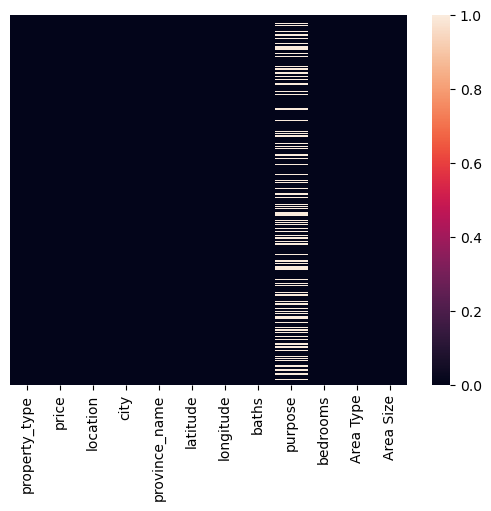

In [106]:
sns.heatmap(df.isnull(),yticklabels=False)

In [150]:
df.isnull().sum()

property_type        0
price                0
location             0
city                 0
province_name        0
latitude             0
longitude            0
baths                0
purpose          47791
bedrooms             0
Area Type            0
Area Size            0
dtype: int64

In [151]:
df.duplicated().sum()

53705

In [152]:
df = df.dropna()
df = df.drop_duplicates() 
df.isnull().sum()

property_type    0
price            0
location         0
city             0
province_name    0
latitude         0
longitude        0
baths            0
purpose          0
bedrooms         0
Area Type        0
Area Size        0
dtype: int64

In [245]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 82333 entries, 0 to 168444
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   property_type  82333 non-null  object 
 1   price          82333 non-null  int64  
 2   location       82333 non-null  object 
 3   city           82333 non-null  object 
 4   province_name  82333 non-null  object 
 5   latitude       82333 non-null  float64
 6   longitude      82333 non-null  float64
 7   baths          82333 non-null  int64  
 8   purpose        82333 non-null  object 
 9   bedrooms       82333 non-null  int64  
 10  Area Type      82333 non-null  object 
 11  Area Size      82333 non-null  float64
dtypes: float64(3), int64(3), object(6)
memory usage: 8.2+ MB


<Axes: >

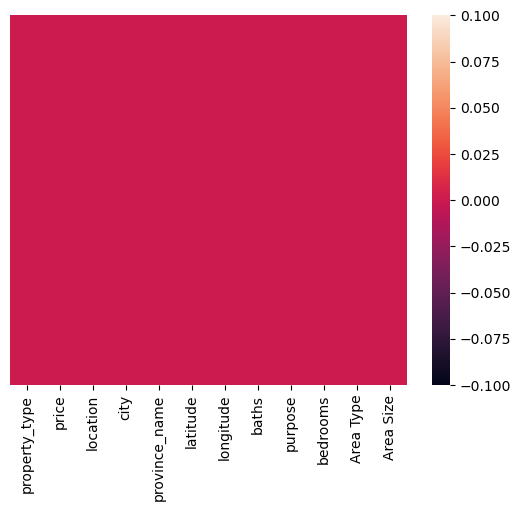

In [246]:
sns.heatmap(df.isnull(),yticklabels=False)

<Axes: >

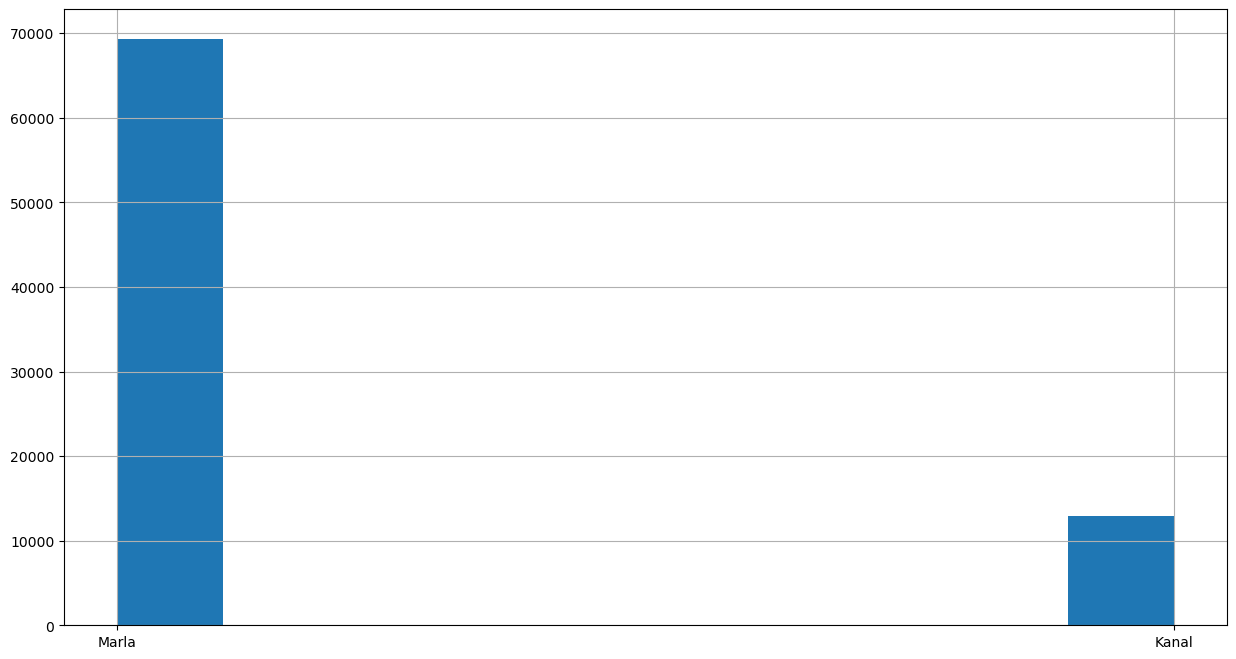

In [69]:
df['Area Type'].hist(figsize=(15,8))

# Converting Area into meter

In [153]:
marla_mask = df['Area Type'] == "Marla"
df.loc[marla_mask, 'Area Size'] *= 25.2929
df.loc[~marla_mask, 'Area Size'] *= 505.857
df=df.drop(columns=['Area Type'],axis=1)
df

,property_type,price,location,city,province_name,latitude,longitude,baths,purpose,bedrooms,Area Size
0,Flat,10000000,G-10,Islamabad,Islamabad Capital,33.679890,73.012640,2,For Sale,2,101.17160
1,Flat,6900000,E-11,Islamabad,Islamabad Capital,33.700993,72.971492,3,For Sale,3,141.64024
2,House,16500000,G-15,Islamabad,Islamabad Capital,33.631486,72.926559,6,For Sale,5,202.34320
3,House,43500000,Bani Gala,Islamabad,Islamabad Capital,33.707573,73.151199,4,For Sale,4,1011.71400
4,House,7000000,DHA Defence,Islamabad,Islamabad Capital,33.492591,73.301339,3,For Sale,3,202.34320
...,...,...,...,...,...,...,...,...,...,...,...
168423,House,39000000,DHA Defence,Lahore,Punjab,31.468350,74.401603,6,For Sale,5,505.85700
168424,House,28000000,Lake City,Lahore,Punjab,31.359647,74.253073,7,For Sale,6,505.85700
168428,House,20500000,DHA Defence,Lahore,Punjab,31.494408,74.437666,4,For Sale,3,252.92900
168431,House,14000000,Bahria Town Karachi,Karachi,Sindh,24.894076,67.027715,4,For Sale,3,151.75740


# Checking variance of numerical columns

In [154]:
print(df['price'].var(),
df['baths'].var(),
df['bedrooms'].var(),
df['Area Size'].var()
     )

1867630828763141.8 7.454705141326347 4.064870540394972 2989234.7396659604


# Scaling features

In [155]:
epsilon = 1e-10
df['price'] = np.log(df['price']+epsilon)
df['Area Size'] = np.log(df['Area Size']+epsilon)

In [132]:
print(df['price'].var(),
df['baths'].var(),
df['bedrooms'].var(),
df['Area Size'].var()
     )

1.130134043663134 7.454705141326347 4.064870540394972 0.6826707701829122


# Check for outlier using plotting

<Axes: >

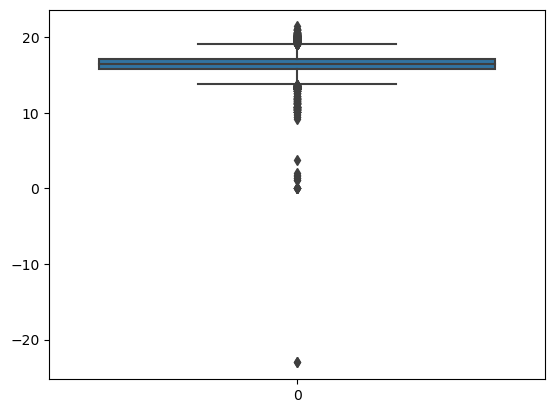

In [133]:
sns.boxplot(df['price'])

<Axes: >

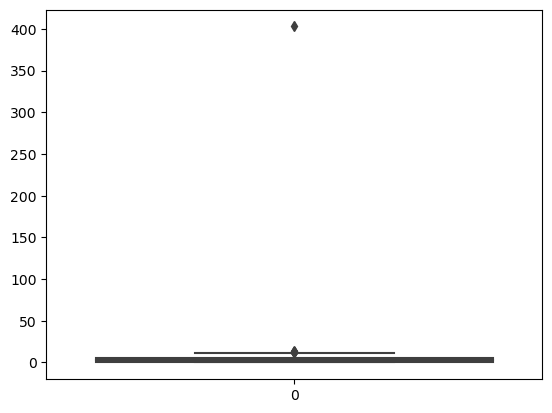

In [134]:
sns.boxplot(df['baths'])

<Axes: >

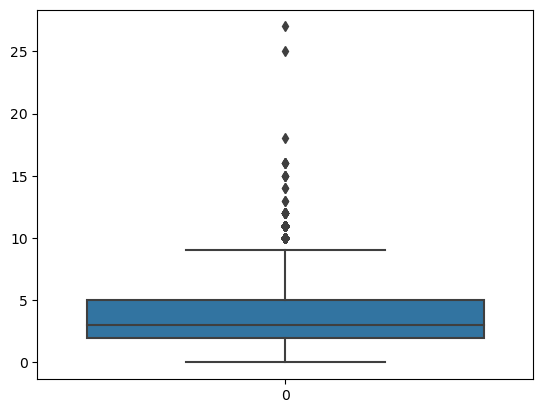

In [135]:
sns.boxplot(df['bedrooms'])

<Axes: >

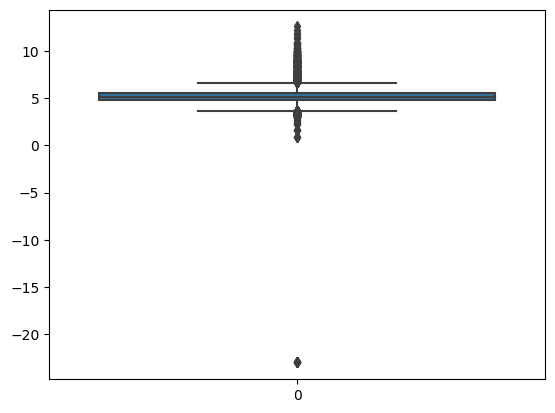

In [136]:
sns.boxplot(df['Area Size'])

# Removing outliers

In [156]:
arr=['price','baths','bedrooms','Area Size']
new_df=df.copy()
for col in arr:
    Q1 = new_df[col].quantile(0.25)
    Q3 = new_df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    new_df[col] = np.where(
        new_df[col] > upper_bound,
        upper_bound,
        np.where(
            new_df[col] < lower_bound,
            lower_bound,
            new_df[col]
        )
    )
df = new_df

<Axes: >

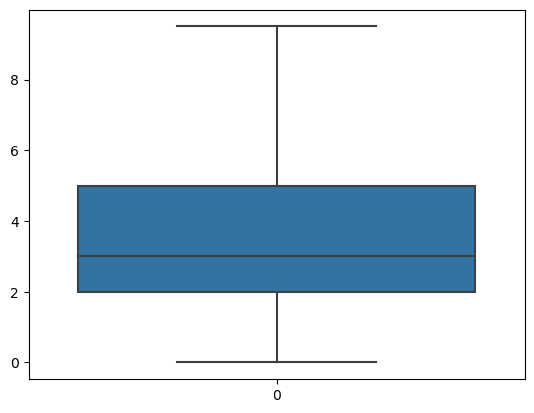

In [157]:
sns.boxplot(df['bedrooms'])

In [55]:
df

,property_type,price,location,city,province_name,latitude,longitude,baths,purpose,bedrooms,Area Size
0,Flat,16.118096,G-10,Islamabad,Islamabad Capital,33.679890,73.012640,2.0,For Sale,2.0,4.616818
1,Flat,15.747032,E-11,Islamabad,Islamabad Capital,33.700993,72.971492,3.0,For Sale,3.0,4.953290
2,House,16.618871,G-15,Islamabad,Islamabad Capital,33.631486,72.926559,6.0,For Sale,5.0,5.309965
3,House,17.588271,Bani Gala,Islamabad,Islamabad Capital,33.707573,73.151199,4.0,For Sale,4.0,6.137425
4,House,15.761421,DHA Defence,Islamabad,Islamabad Capital,33.492591,73.301339,3.0,For Sale,3.0,5.309965
...,...,...,...,...,...,...,...,...,...,...,...
168423,House,17.479072,DHA Defence,Lahore,Punjab,31.468350,74.401603,6.0,For Sale,5.0,6.137425
168424,House,17.147715,Lake City,Lahore,Punjab,31.359647,74.253073,7.0,For Sale,6.0,6.137425
168428,House,16.835935,DHA Defence,Lahore,Punjab,31.494408,74.437666,4.0,For Sale,3.0,5.533109
168431,House,16.454568,Bahria Town Karachi,Karachi,Sindh,24.894076,67.027715,4.0,For Sale,3.0,5.022283


# Encoding using category_encoders


In [158]:
import category_encoders as ce

categorical_column=['property_type','location','city','province_name','purpose']
encoder = ce.TargetEncoder(cols=categorical_column)
df_encoded = encoder.fit_transform(df,df['price'])
df_encoded

,property_type,price,location,city,province_name,latitude,longitude,baths,purpose,bedrooms,Area Size
0,15.905788,16.118096,16.958170,16.690241,16.690241,33.679890,73.012640,2.0,16.495416,2.0,4.616818
1,15.905788,15.747032,16.754300,16.690241,16.690241,33.700993,72.971492,3.0,16.495416,3.0,4.953290
2,16.700250,16.618871,16.450798,16.690241,16.690241,33.631486,72.926559,6.0,16.495416,5.0,5.309965
3,16.700250,17.588271,16.740717,16.690241,16.690241,33.707573,73.151199,4.0,16.495416,4.0,6.683569
4,16.700250,15.761421,17.413214,16.690241,16.690241,33.492591,73.301339,3.0,16.495416,3.0,5.309965
...,...,...,...,...,...,...,...,...,...,...,...
168423,16.700250,17.479072,17.413214,16.591260,16.471642,31.468350,74.401603,6.0,16.495416,5.0,6.226254
168424,16.700250,17.147715,16.643049,16.591260,16.471642,31.359647,74.253073,7.0,16.495416,6.0,6.226254
168428,16.700250,16.835935,17.413214,16.591260,16.471642,31.494408,74.437666,4.0,16.495416,3.0,5.533109
168431,16.700250,16.454568,16.165117,16.447231,16.447231,24.894076,67.027715,4.0,16.495416,3.0,5.022283


In [159]:
X=df_encoded.drop(columns=['price'],axis=1)
y=df['price']

# Splitting Dataset

In [160]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

array([[<Axes: title={'center': 'property_type'}>,
        <Axes: title={'center': 'location'}>,
        <Axes: title={'center': 'city'}>],
       [<Axes: title={'center': 'province_name'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'longitude'}>],
       [<Axes: title={'center': 'baths'}>,
        <Axes: title={'center': 'purpose'}>,
        <Axes: title={'center': 'bedrooms'}>],
       [<Axes: title={'center': 'Area Size'}>, <Axes: >, <Axes: >]],
      dtype=object)

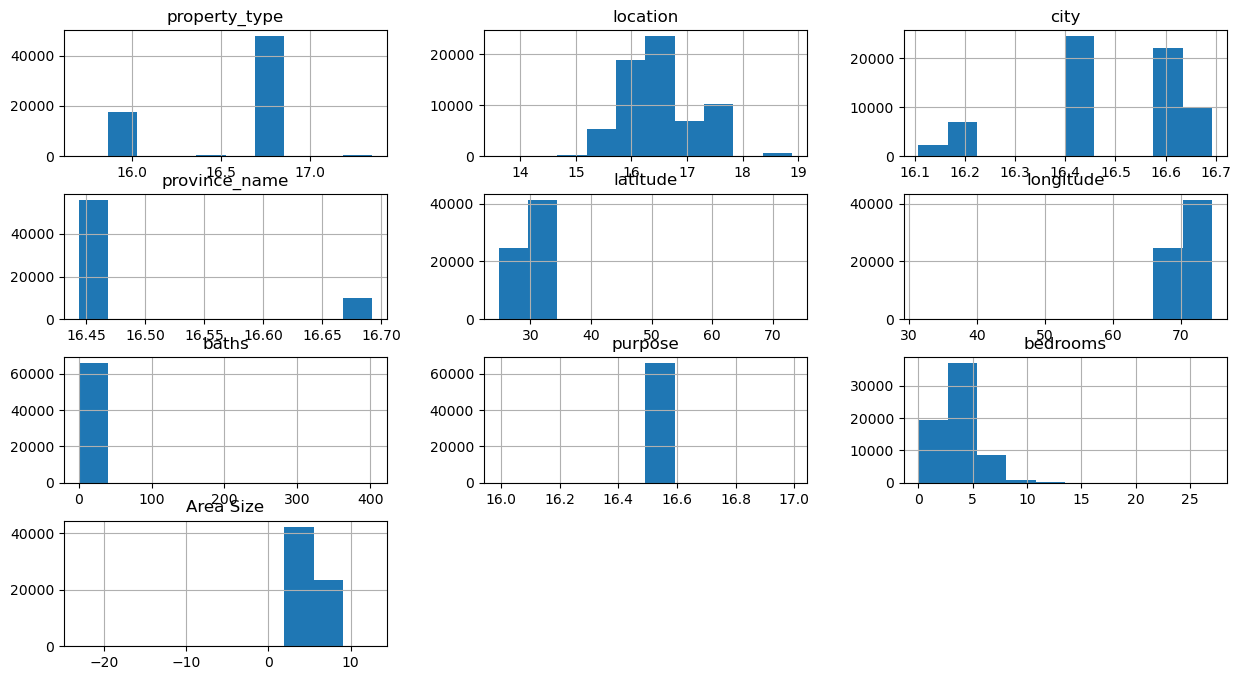

In [265]:
X_train.hist(figsize=(15,8))

# Looking for Feature engineering

<Axes: >

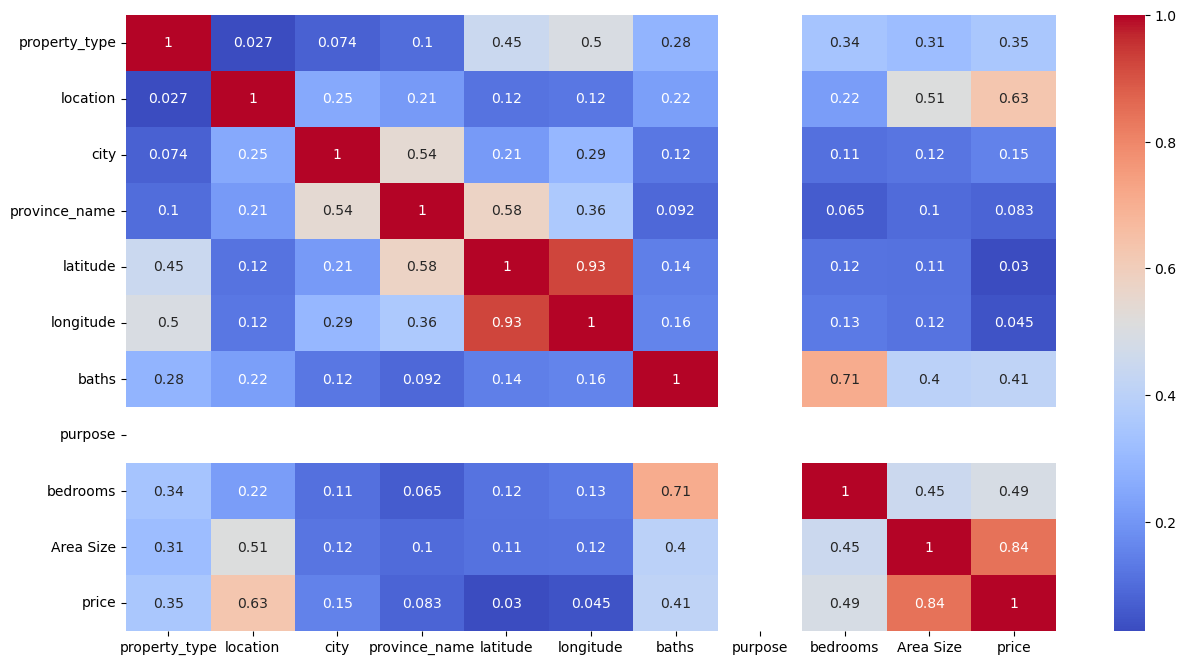

In [142]:
plt.figure(figsize=(15,8))
sns.heatmap(X.join(y).corr(),annot=True,cmap='coolwarm')

# Building Linear model

In [161]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

# Evalauting the model

Text(0, 0.5, 'Predicted values')

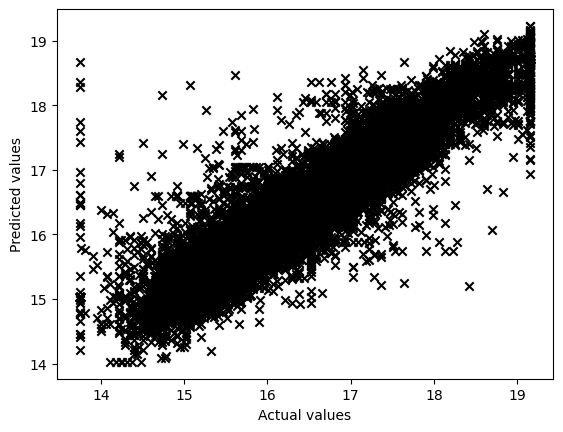

In [162]:
y_pred=model.predict(X_test)
plt.scatter(y_test,y_pred,marker='x',color='black')
plt.xlabel("Actual values")
plt.ylabel("Predicted values")

C:\Users\khale\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\khale\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


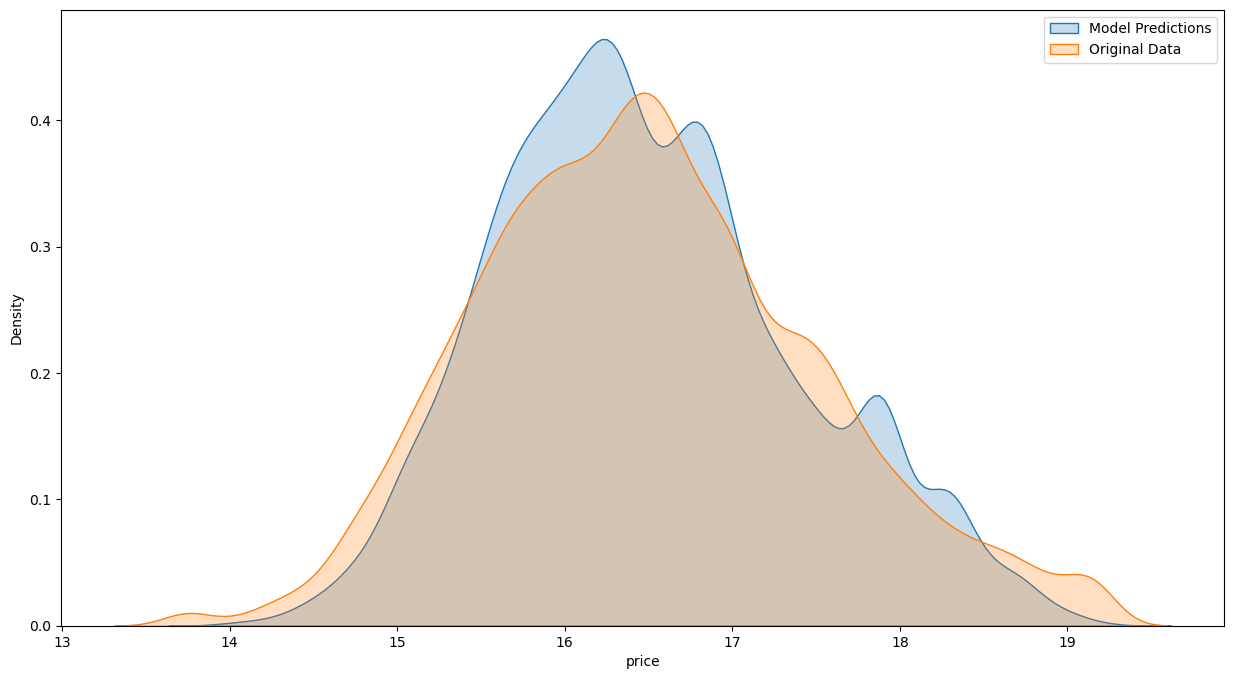

In [163]:
plt.figure(figsize=(15,8))
sns.kdeplot(x=y_pred, label='Model Predictions', fill=True)
sns.kdeplot(x=y_test, label='Original Data', fill=True)
plt.legend();

# Score of linear model

In [167]:
m_score_test=model.score(X_test,y_test)
r2 = r2_score(y_test, y_pred)
train_mse_scaled = mean_squared_error(y_train, model.predict(X_train))
test_mse_scaled = mean_squared_error(y_test, y_pred)
rmse=np.sqrt(test_mse_scaled)
print(f"model score_test : {m_score_test}\nR-squared: {r2}\nmean_squared_error_train: {train_mse_scaled}\nmean_square_error_test: {test_mse_scaled}\nrmse : {rmse}")

model score_test : 0.8214024142241375
R-squared: 0.8620734920732844
mean_squared_error_train: 0.1826217032606717
mean_square_error_test: 0.1395395852913128
rmse : 0.37354997696601827


# Building Knn model

In [182]:
from sklearn.neighbors import KNeighborsRegressor

Knn=KNeighborsRegressor(n_neighbors=3)
Knn.fit(X_train,y_train)
y_pred=Knn.predict(X_test)

# Score of Knn model

In [183]:
m_score_test_knn=model.score(X_test,y_test)
r2_knn = r2_score(y_test, y_pred)
train_mse_scaled_knn = mean_squared_error(y_train, model.predict(X_train))
test_mse_scaled_knn = mean_squared_error(y_test, y_pred)
rmse_knn=np.sqrt(test_mse_scaled)
print(f"model score_test : {m_score_test_knn}\nR-squared: {r2}\nmean_squared_error_train: {train_mse_scaled_knn}\nmean_square_error_test: {test_mse_scaled_knn}\nrmse : {rmse_knn}")

model score_test : 0.8214024142241375
R-squared: 0.8620734920732844
mean_squared_error_train: 0.1826217032606717
mean_square_error_test: 0.1379201668895691
rmse : 0.37354997696601827
